#### Image Classifier

In [0]:
# import packages
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
#download Fashion-MNIST
transform = transforms.Compose(
    [transforms.ToTensor(),
     ])

train_set = torchvision.datasets.FashionMNIST(root = 'Fashion-MNIST/processed/training.pt', train = True, download = True, transform = transform)
test_set = torchvision.datasets.FashionMNIST(root = 'Fashion-MNIST/processed/test.pt', train = False, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size = 16, shuffle = True, num_workers = 8)
testloader = torch.utils.data.DataLoader(test_set, batch_size = 16, shuffle = False, num_workers = 8)

classes = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']
encoded_classes = [k for k,_ in enumerate(classes)]

Extracting Fashion-MNIST/processed/training.pt/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion-MNIST/processed/training.pt/FashionMNIST/raw


Extracting Fashion-MNIST/processed/training.pt/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion-MNIST/processed/training.pt/FashionMNIST/raw



Extracting Fashion-MNIST/processed/training.pt/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion-MNIST/processed/training.pt/FashionMNIST/raw


Extracting Fashion-MNIST/processed/training.pt/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion-MNIST/processed/training.pt/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting Fashion-MNIST/processed/test.pt/FashionMNIST/raw/train-images-idx3-ubyte.gz to Fashion-MNIST/processed/test.pt/FashionMNIST/raw




Extracting Fashion-MNIST/processed/test.pt/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Fashion-MNIST/processed/test.pt/FashionMNIST/raw


Extracting Fashion-MNIST/processed/test.pt/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Fashion-MNIST/processed/test.pt/FashionMNIST/raw


Extracting Fashion-MNIST/processed/test.pt/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Fashion-MNIST/processed/test.pt/FashionMNIST/raw
Processing...
Done!


#### Inspect images

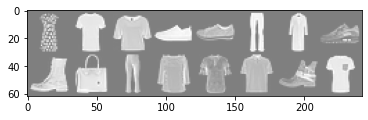

dress t-shirt shirt sneaker sneaker trouser  coat sneaker ankle-boot   bag trouser shirt shirt t-shirt ankle-boot t-shirt


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

#### Definf CNN

In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
    self.fc1 = nn.Linear(in_features = 16 * 4 * 4, out_features = 120)
    self.fc2 = nn.Linear(in_features = 120, out_features = 84)
    self.fc3 = nn.Linear(in_features = 84, out_features = 10)
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, start_dim = 1, end_dim = -1) #Torch supports mini-batch only
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [0]:
#define loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [0]:
#train network

for epoch in range(50):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    #get inputs; data is a list of [inputs, labels]
    inputs, labels = data

    #zero the parameter gradients
    optimizer.zero_grad()

    #forward + backward + optimizer
    outputs = net(inputs)
    loss = criterion(outputs, labels) #get loss
    loss.backward() #get gradients
    optimizer.step() #get optimizer weights

    #print statistics
    running_loss += loss.item()
    if i % 200 == 199: #print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 200))
      running_loss = 0.0
print('Finished Training')

[1,   200] loss: 1.325
[1,   400] loss: 0.893
[1,   600] loss: 0.762
[1,   800] loss: 0.699
[1,  1000] loss: 0.671
[1,  1200] loss: 0.608
[1,  1400] loss: 0.622
[1,  1600] loss: 0.564
[1,  1800] loss: 0.536
[1,  2000] loss: 0.537
[1,  2200] loss: 0.516
[1,  2400] loss: 0.518
[1,  2600] loss: 0.477
[1,  2800] loss: 0.457
[1,  3000] loss: 0.514
[1,  3200] loss: 0.488
[1,  3400] loss: 0.475
[1,  3600] loss: 0.440
[2,   200] loss: 0.443
[2,   400] loss: 0.411
[2,   600] loss: 0.425
[2,   800] loss: 0.395
[2,  1000] loss: 0.424
[2,  1200] loss: 0.394
[2,  1400] loss: 0.395
[2,  1600] loss: 0.414
[2,  1800] loss: 0.375
[2,  2000] loss: 0.403
[2,  2200] loss: 0.392
[2,  2400] loss: 0.395
[2,  2600] loss: 0.402
[2,  2800] loss: 0.389
[2,  3000] loss: 0.386
[2,  3200] loss: 0.398
[2,  3400] loss: 0.378
[2,  3600] loss: 0.379
[3,   200] loss: 0.349
[3,   400] loss: 0.366
[3,   600] loss: 0.371
[3,   800] loss: 0.330
[3,  1000] loss: 0.365
[3,  1200] loss: 0.387
[3,  1400] loss: 0.345
[3,  1600] 

In [0]:
#save model
path = './fashion_net.pth'
torch.save(net.state_dict(), path)

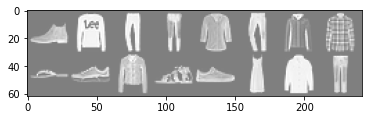

GRound truth:  ankle-boot pullover trouser trouser shirt trouser  coat shirt sandal sneaker  coat sandal sneaker dress  coat trouser


In [0]:
#testing
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('GRound truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [0]:
net = Net() #load back model
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [0]:
outputs.shape

torch.Size([16, 10])

In [0]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(16)))

Predicted:  ankle-boot pullover trouser trouser shirt trouser  coat shirt sandal sneaker  coat sandal sneaker dress pullover trouser


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad(): #deactivate back-prop for evaluation
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of t-shirt : 82 %
Accuracy of trouser : 97 %
Accuracy of pullover : 87 %
Accuracy of dress : 87 %
Accuracy of  coat : 78 %
Accuracy of sandal : 96 %
Accuracy of shirt : 70 %
Accuracy of sneaker : 95 %
Accuracy of   bag : 97 %
Accuracy of ankle-boot : 95 %


In [0]:
#training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [0]:
#convert all modules and parameters of Net to CUDA tensors
net.to(device)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
#send inputs and targets at every step to GPU
inputs, labels = data[0].to(device), data[1].to(device)